In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from kmodes.kprototypes import KPrototypes  
from kmodes.kmodes import KModes

In [3]:
df = pd.read_csv("segmentation_data.csv")
df.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [4]:
df.tail()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
1995  100001996    1               0   47          1  123525           0   
1996  100001997    1               1   27          1  117744           1   
1997  100001998    0               0   31          0   86400           0   
1998  100001999    1               1   24          1   97968           0   
1999  100002000    0               0   25          0   68416           0   

      Settlement size  
1995                0  
1996                0  
1997                0  
1998                0  
1999                0

In [5]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [6]:
df_temp = df[['ID','Age', 'Income']]
df_temp

ID  Age  Income
0     100000001   67  124670
1     100000002   22  150773
2     100000003   49   89210
3     100000004   45  171565
4     100000005   53  149031
...         ...  ...     ...
1995  100001996   47  123525
1996  100001997   27  117744
1997  100001998   31   86400
1998  100001999   24   97968
1999  100002000   25   68416

[2000 rows x 3 columns]

In [7]:
scaler = MinMaxScaler()

scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

scaler.fit(df[["Income"]])
df["Income"] = scaler.transform(df[["Income"]])


In [8]:
df = df.drop(["ID"], axis=1)

In [9]:

mark_array = df.values

mark_array[:, 2] = mark_array[:, 2].astype(float)
mark_array[:, 4] = mark_array[:, 4].astype(float)

In [10]:

kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0,1,3,5,6])

print(kproto.cluster_centroids_)

len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 700, ncost: 167.69279802916398
Run: 1, iteration: 2/20, moves: 237, ncost: 165.59541055036485
Run: 1, iteration: 3/20, moves: 125, ncost: 159.9479447936193
Run: 1, iteration: 4/20, moves: 67, ncost: 159.66151562559725
Run: 1, iteration: 5/20, moves: 18, ncost: 159.64054532092828
Run: 1, iteration: 6/20, moves: 1, ncost: 159.64048084617934
Run: 1, iteration: 7/20, moves: 0, ncost: 159.64048084617934
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 766, ncost: 173.72160715884476
Run: 2, iteration: 2/20, moves: 144, ncost: 173.4097043117416
Run: 2, iteration: 3/20, moves: 23, ncost: 173.38090644903772
Run: 2, iteration: 4/20, moves: 20, ncost: 173.36762497771204
Run: 2, iteration: 5/20, moves: 14, ncost: 173.35727316757308
Run: 2, iteration: 

10

In [11]:
cluster_dict = []

for c in clusters:
    cluster_dict.append(c)

    
df["cluster"] = cluster_dict

df[["ID","Age","Income"]] = df_temp

In [12]:
df[df["cluster"]==0].head(10)

Sex  Marital status  Age  Education  Income  Occupation  Settlement size  \
3     0               0   45          1  171565           1                1   
16    0               0   53          1  125550           1                0   
20    0               0   48          1  118777           1                1   
21    0               0   44          1  147511           1                1   
23    0               0   44          1  134918           1                2   
37    0               0   37          1  127676           1                1   
38    0               0   37          1  119276           1                1   
46    0               0   39          1  140182           1                0   
61    0               0   50          1  123641           1                1   
65    0               0   48          1  148115           1                1   

    cluster         ID  
3         0  100000004  
16        0  100000017  
20        0  100000021  
21        0  100000022  
23        0  100000024  
37        0  100000038  
38        0  100000039  
46        0  100000047  
61        0  100000062  
65        0  100000066

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


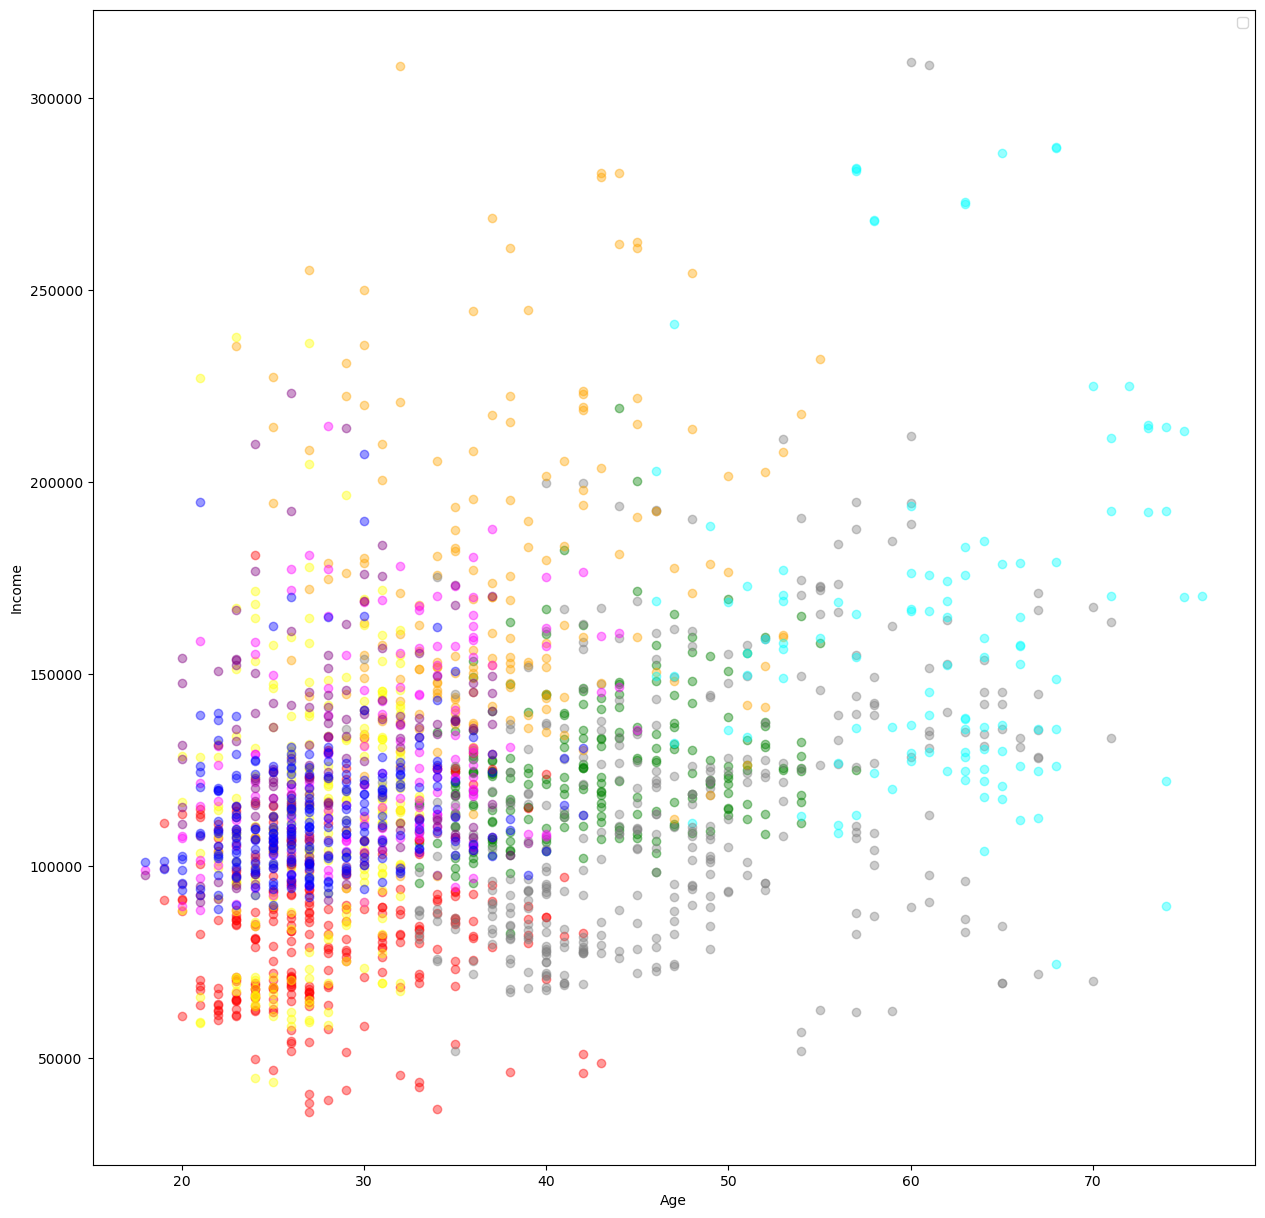

In [13]:

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]
df7 = df[df.cluster==6]
df8 = df[df.cluster==7]
df9 = df[df.cluster==8]
df10 = df[df.cluster==9]

plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(df1.Age, df1['Income'],color='green', alpha = 0.4)
plt.scatter(df2.Age, df2['Income'],color='red', alpha = 0.4)
plt.scatter(df3.Age, df3['Income'],color='gray', alpha = 0.4)
plt.scatter(df4.Age, df4['Income'],color='orange', alpha = 0.4)
plt.scatter(df5.Age, df5['Income'],color='yellow', alpha = 0.4)
plt.scatter(df6.Age, df6['Income'],color='cyan', alpha = 0.4)
plt.scatter(df7.Age, df7['Income'],color='magenta', alpha = 0.4)
plt.scatter(df8.Age, df8['Income'],color='gray', alpha = 0.4)
plt.scatter(df9.Age, df9['Income'],color='purple', alpha = 0.4)
plt.scatter(df10.Age, df10['Income'],color='blue', alpha = 0.4)

plt.legend()
plt.show()
